# Introduction
According to the TomTom Index Traffic Report, which was based on 2014 data, Seattle is known for having the fourth worst traffic congestion in the United States. Mooreover, Seattle had a total of 13,971 accidents in 2014, the highest in the state. Third major reason of mortality in the world is death in a traffic accident. Because of that, many may feel lack of security when they drive or even walk the street as a pedestrain.
Seattle Department of Transportation provides traffic accident cases from 2004 to examine the data and (probably) discover the reasons behind these collisions.

The aim of this project is to see whether there are any actions that could be taken to avoid accidents or reduce their severity by analyzing data from the Seattle Department of Transportation. It will be done by analyzing the collision dataset for the city of Seattle and find patterns and determinate key factors such as weather, light and road conditions, drug or alcohol influence, driver inattention to provide the best traffic accident severity prediction. Various analytical techniques and machine learning classification algorithms will be used, such as: K-nearest-neighbors, Decision Tree Analysis, Support Vector Machine.

This study is focused on improving traffic policies or updating public facilities such as street lamp,  speed bumps at proper positions. Car rental or insurance companies can also classify potentical customers and design different service content based on customers driving habits, that's why they are also among the target groups of this analysis.

# Data
The data used in this project is from Seattle's Collision GIS (Geographic Information System), a computer system used for capturing, storing and displaying data related to positions on Earth's surface. The dataset regarding to this project contains various features of collisions in Seattle from 2004 to 2020. There are almost 200,000 collisions in the dataset and 38 features. Some of them, of course, won't be useful - that's why I will explore in more detail only:

* **Severity Code** - the target used to compare the features' impact on,
* **Severity Description** - description of the severity codes,
* **X and Y values** - coordinates,
* **Address Type** - alley, block or intersection of collision,
* **Collision Type** - 10 types of collisions such as parked car, angles, rear end, pedestrian, etc.,
* **Person Count** - number of people involved in collision,
* **Pedestrian Count** - number of pedestrians involved in collision,
* **Cyclist Count** - number of cyclists involved in collision,
* **Vehicle count** - number of vehicles involved in collision,
* **Date/Time** - date/time of an accident,
* **Junction Type** - 7 types describing collision at intersection, mid-block, driveway and whether collision is related to intersection,
* **Seattle Collision Code** - Seattle codes to describe each collision,
* **Seattle Collision Description** - description of Seattle collision codes,
* **Under Influence** - alcohol or drugs involved,
* **Weather** - kind of weather during an accident,
* **Road Conditions** - adverse road conditions,
* **Light Conditions** - adverse light conditions,
* **State Collision Code** - 84 codes the state uses to describe each collision,
* **State Collision Description** - description of state collision codes,
* **Hit Parked Car** - a parked car involved in the collision.


In [48]:
conda install seaborn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         2.9 MB
    seaborn-0.9.0              |           py37_0         355 KB
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                            anaconda --> pkgs/main
  seaborn                                          anaconda --> pkgs/main



seaborn-0.9.0        | 355 KB    | ##################################### | 100% 
conda-4.8.4          | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: \ WARNING conda.core.path_acti

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import scipy.optimize as opt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [3]:
url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(url, low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Let's see the basic data:

In [4]:
print('Number of features:', df.shape[1])
print('Number of recorded collisions:', df.shape[0])

Number of features: 38
Number of recorded collisions: 194673


In [5]:
def bar_plot(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize = size)
    ax = sns.barplot(x = codes, y = count)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.show()

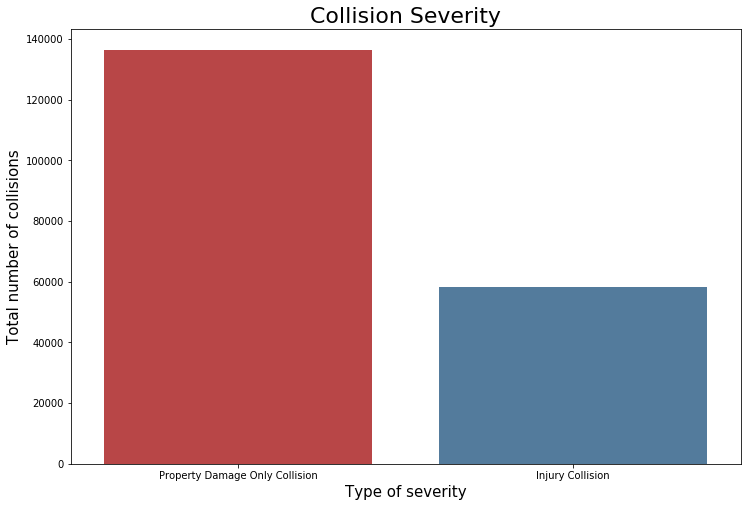

In [6]:
sns.set_palette("Set1", 8, .75)
bar_plot(df['SEVERITYDESC'], 'Type of severity', 'Total number of collisions', 'Collision Severity', size=(12,8))

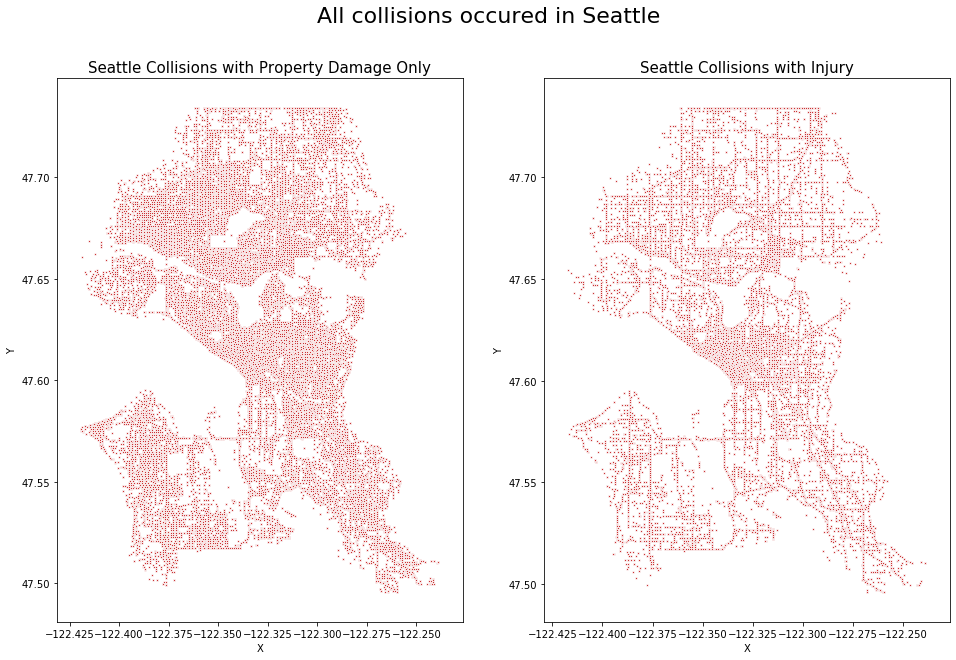

In [7]:
property_damage_df = df.loc[df['SEVERITYCODE'] == 1]
injury_df = df.loc[df['SEVERITYCODE'] == 2]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,10))
fig.suptitle('All collisions occured in Seattle', fontsize=22)
sns.set_palette("icefire")
ax1 = sns.scatterplot(x = property_damage_df['X'], y = property_damage_df['Y'], s=5, ax=ax1)
ax1.set_title('Seattle Collisions with Property Damage Only', fontsize=15)
ax2 = sns.scatterplot(x=injury_df['X'], y=injury_df['Y'], s = 5, ax=ax2)
ax2.set_title('Seattle Collisions with Injury', fontsize=15);

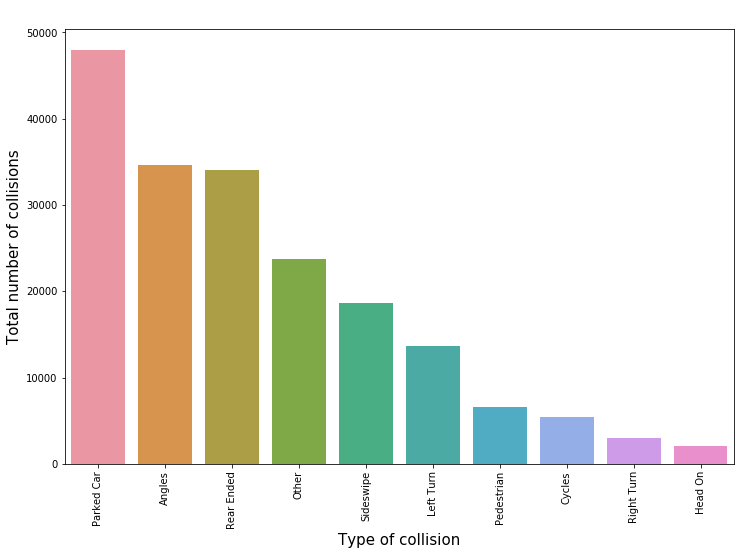

In [8]:
bar_plot(df['COLLISIONTYPE'], 'Type of collision', 'Total number of collisions', ' ', rotate=90)

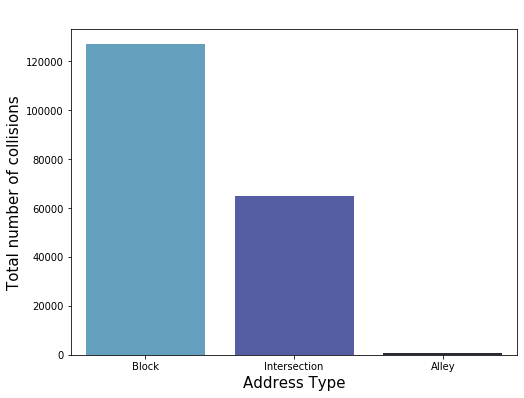

In [9]:
bar_plot(df['ADDRTYPE'], 'Address Type', 'Total number of collisions', ' ', size=(8,6))

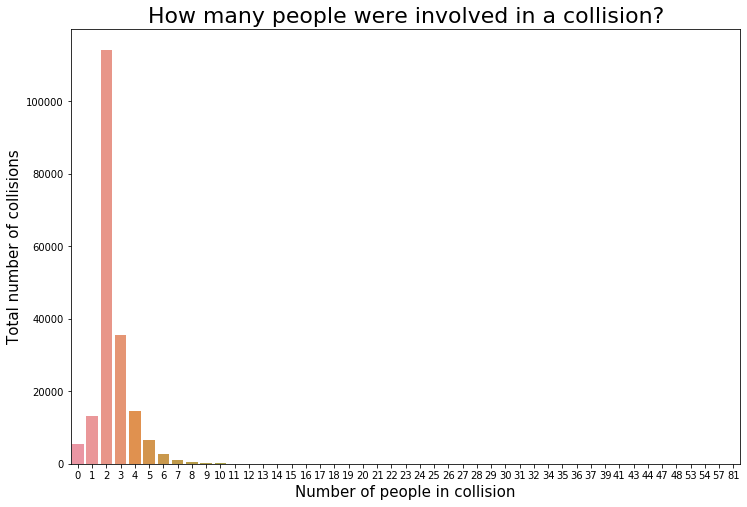

In [21]:
bar_plot(df['PERSONCOUNT'], 'Number of people in collision', 
         'Total number of collisions', 'How many people were involved in a collision?')

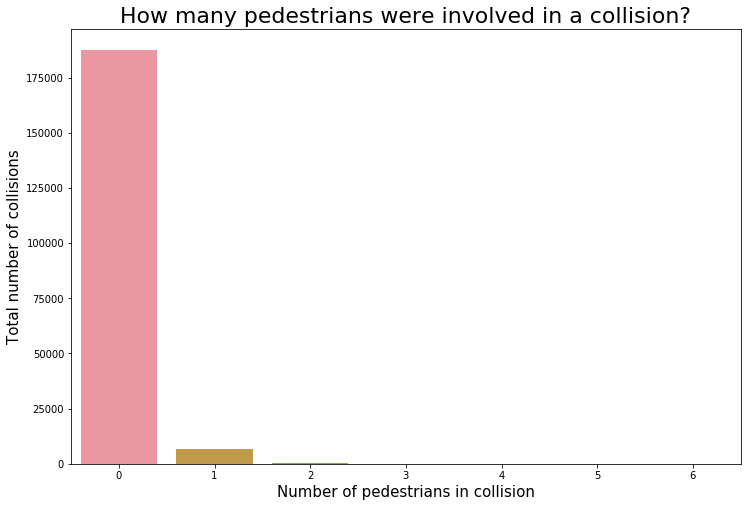

In [22]:
bar_plot(df['PEDCOUNT'], 'Number of pedestrians in collision', 
         'Total number of collisions', 'How many pedestrians were involved in a collision?')

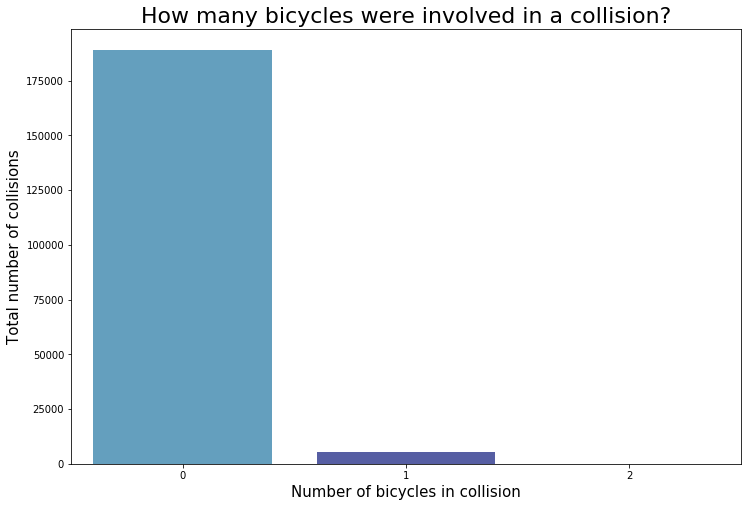

In [23]:
bar_plot(df['PEDCYLCOUNT'], 'Number of bicycles in collision', 
         'Total number of collisions', 'How many bicycles were involved in a collision?')

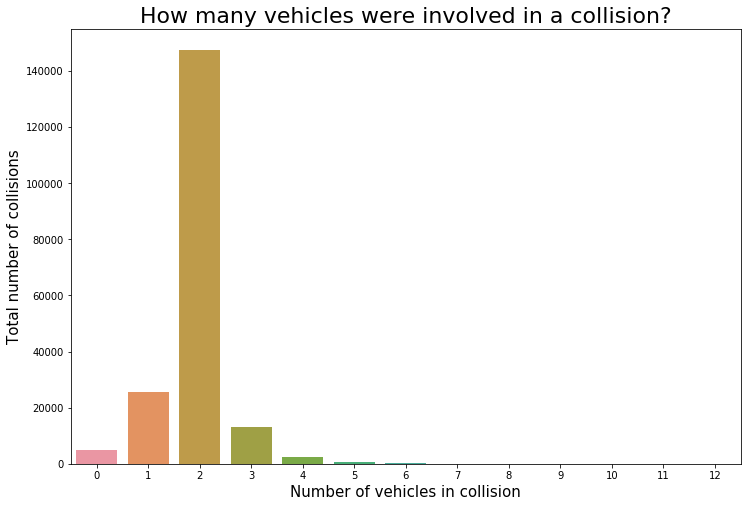

In [25]:
bar_plot(df['VEHCOUNT'], 'Number of vehicles in collision', 
         'Total number of collisions', 'How many vehicles were involved in a collision?')

In [17]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], infer_datetime_format=True)
df['Year'] = df['INCDTTM'].dt.year
df['Month'] = df['INCDTTM'].dt.month
df['Day'] = df['INCDTTM'].dt.weekday
df['Hour'] = df['INCDTTM'].dt.hour

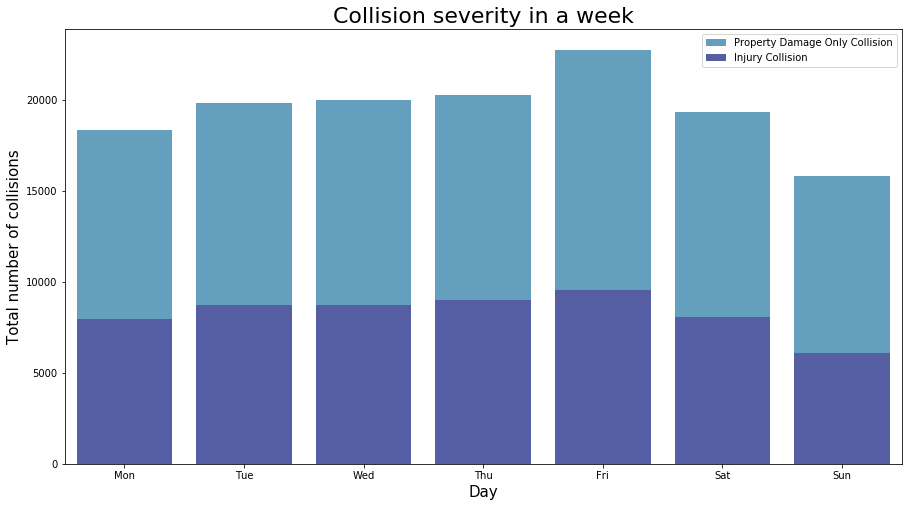

In [32]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Day', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Total number of collisions', fontsize=15)
ax.set_title('Collision severity in a week', fontsize=22)
ax.set_xticklabels(days)
ax.legend();

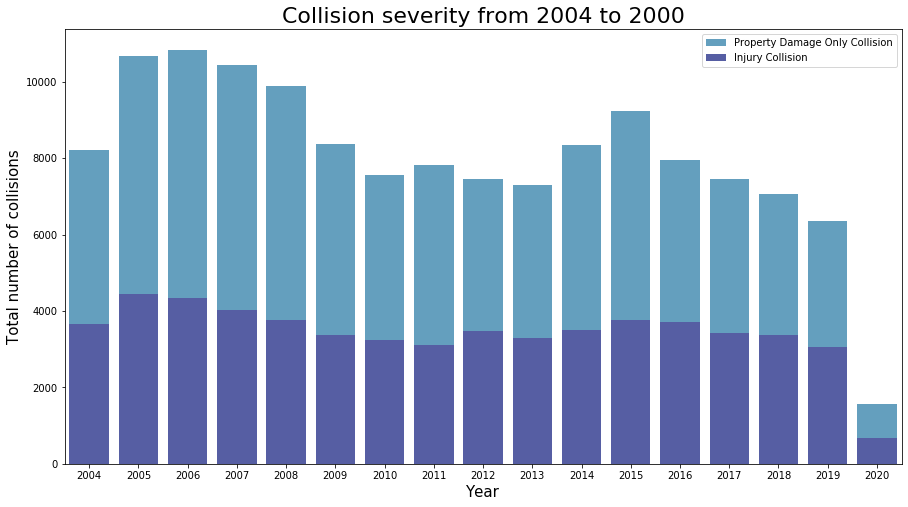

In [39]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Year', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total number of collisions', fontsize=15)
ax.set_title('Collision severity from 2004 to 2000', fontsize=22)
ax.legend();


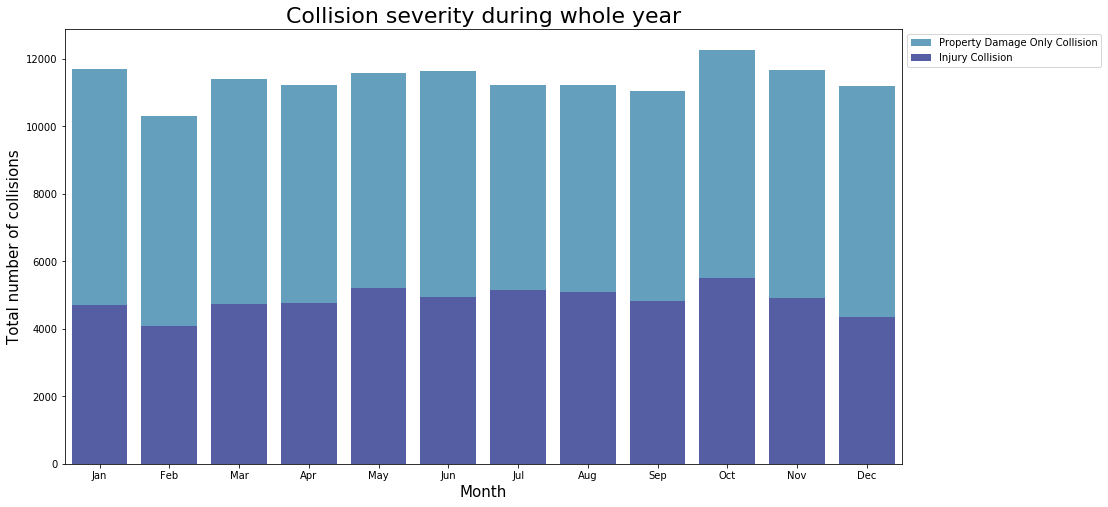

In [31]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Month', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Total number of collisions', fontsize=15)
ax.set_title('Collision severity during whole year', fontsize=22)
ax.set_xticklabels(months)
ax.legend(bbox_to_anchor=(1,1));

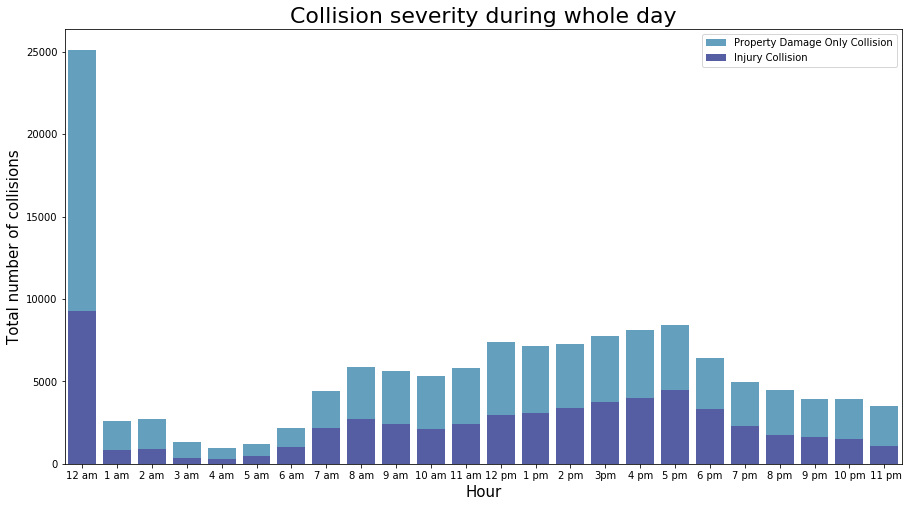

In [30]:
hours=['12 am','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm',' 11 pm']
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Hour', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Total number of collisions', fontsize=15)
ax.set_title('Collision severity during whole day', fontsize=22)
ax.set_xticklabels(hours)
ax.legend(bbox_to_anchor=(1,1));

In [33]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['0','1'],['N','Y'])

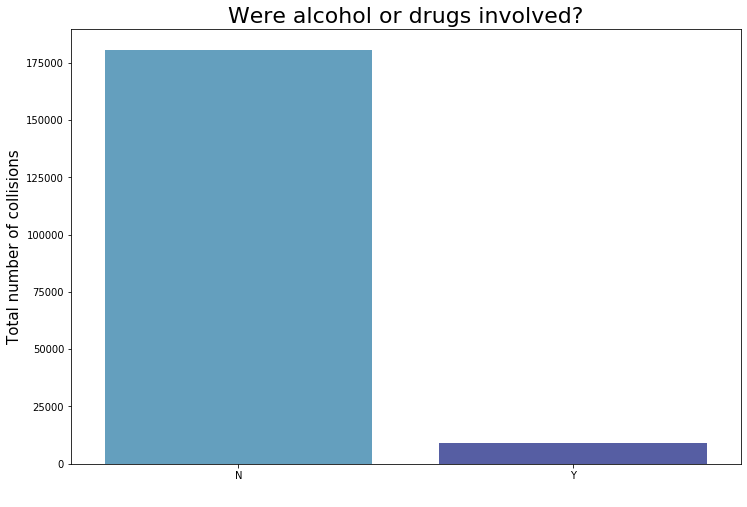

In [35]:
bar_plot(df['UNDERINFL'], ' ', 'Total number of collisions', 'Were alcohol or drugs involved?')

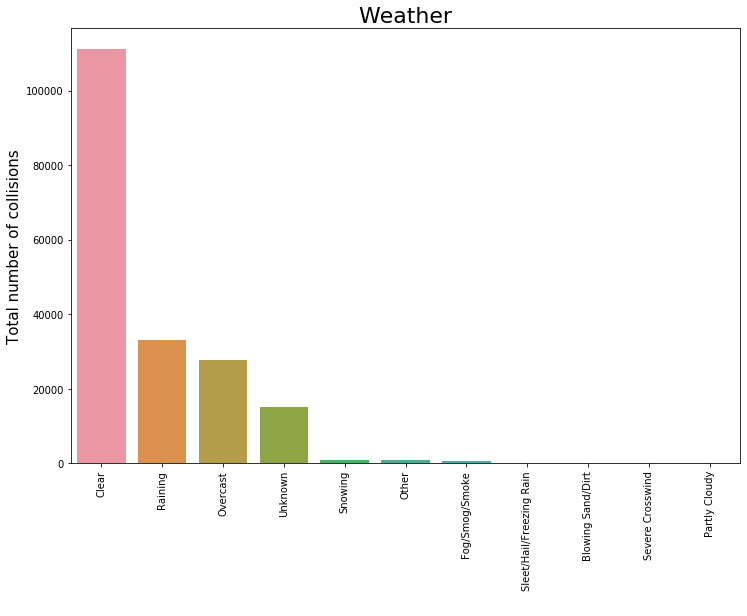

In [37]:
bar_plot(df['WEATHER'], ' ', 'Total number of collisions', 'Weather', rotate=90)

#### Assumptions:
- accidents, including collisions that involve injury, occurs very often between midnight and 1 am.,
- although collisions with pedestrians and cyclists are very rare, the number of such accidents is still very high,
- the collisions involving injury tend to happen inside and nearby the downtown area and major highways,
- the number of collisions appears to be trending down in the past 16 years.

# Methodology
In this project we will direct our efforts on things that can be done, from an individual point of view, to reduce the number of collisions and their severity.


In first step we have collected the required **data: prepare the data for different machine learning classifiers. This includes missing data, restructuring data and normalizing the data**. The next step is to feed the data into 5 different classifiers and get statistics on the results. Since we have a large dataset, and the number of incidents with missing data is very low, we can drop the rows with missing values. Next, it is important to go through each feature to make sure it is of a type our algorithm will take, and make sure the values made sense. For some, they needed to be encoded as a '0/1' for each value. Once the data was fully prepared, it is proper to make a copy for use at the end of the project to feed into the final model.


Second step in our analysis will be balancing the data. As there are much more collisions without injury, we can undersample the majority class (*class 1*). There are still 100,000 rows of clean, balanced data. The next step is feature selection. Most of the data is compatible for the algorithms used, except for data such as coordinates or department codes.  


In third and final step we will focus on standardizing the data to feed into the classifiers by spliting the data into training data (80 %) and testing data (20 %) first. All features' scales are equal because of the unit variance. The 5 most used classifiers have been implemented to see what each model would return.

In [43]:
# copy dataframe
copy_df = df[['SEVERITYCODE', 'SEVERITYDESC', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
        'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
        'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'Month', 'Day', 'Hour']].copy()

In [44]:
copy_df.isnull().sum() # number of missing values in each feature

SEVERITYCODE        0
SEVERITYDESC        0
X                5334
Y                5334
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDTTM             0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
SDOT_COLDESC        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
ST_COLDESC       4904
Month               0
Day                 0
Hour                0
dtype: int64

In [45]:
copy_df.dropna(subset=['X','Y','COLLISIONTYPE','JUNCTIONTYPE','LIGHTCOND','WEATHER','ROADCOND'], inplace=True)
copy_df.isnull().sum()

SEVERITYCODE     0
SEVERITYDESC     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDTTM          0
JUNCTIONTYPE     0
SDOT_COLCODE     0
SDOT_COLDESC     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
Month            0
Day              0
Hour             0
dtype: int64

In [47]:
copy_df.dtypes

SEVERITYCODE              int64
SEVERITYDESC             object
X                       float64
Y                       float64
ADDRTYPE                 object
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
JUNCTIONTYPE             object
SDOT_COLCODE              int64
SDOT_COLDESC             object
UNDERINFL                object
WEATHER                  object
ROADCOND                 object
LIGHTCOND                object
ST_COLCODE               object
ST_COLDESC               object
Month                     int64
Day                       int64
Hour                      int64
dtype: object

In [49]:
copy_df.COLLISIONTYPE.value_counts()

Parked Car    42886
Angles        34353
Rear Ended    32778
Sideswipe     17862
Left Turn     13586
Pedestrian     6481
Cycles         5334
Right Turn     2901
Head On        1979
Name: COLLISIONTYPE, dtype: int64

In [50]:
copy_df.COLLISIONTYPE.replace(to_replace=['Other'], value=np.NaN, inplace=True)
copy_df.dropna(subset=['COLLISIONTYPE'], inplace=True)

In [51]:
copy_df.WEATHER.value_counts()

Clear                       95134
Raining                     27047
Overcast                    23163
Unknown                     10872
Snowing                       691
Other                         674
Fog/Smog/Smoke                430
Sleet/Hail/Freezing Rain       84
Blowing Sand/Dirt              46
Severe Crosswind               15
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [52]:
copy_df.WEATHER.replace(to_replace=['Raining', 'Sleet/Hail/Freezing Rain'], value='Wet weather', inplace=True)
copy_df.WEATHER.replace(to_replace=['Overcast', 'Fog/Smog/Smoke', 'Partly Cloudy'], value='Bad visibility', inplace=True)
copy_df.WEATHER.replace(to_replace=['Blowing Sand/Dirt', 'Severe Crosswind'], value='Windy', inplace=True)
copy_df.WEATHER.replace(to_replace=['Unknown', 'Other'], value=np.NaN, inplace=True)
copy_df.dropna(subset=['WEATHER'], inplace=True)

In [53]:
copy_df.UNDERINFL.replace(to_replace={'N':'0', 'Y':'1', np.nan:'0'}, inplace=True)
copy_df.UNDERINFL = copy_df.UNDERINFL.astype(int)

In [54]:
copy_df.UNDERINFL.value_counts()

0    140267
1      6347
Name: UNDERINFL, dtype: int64

In [55]:
copy_df.ROADCOND.value_counts()

Dry               105887
Wet                38472
Ice                  710
Unknown              694
Snow/Slush           689
Other                 61
Standing Water        50
Sand/Mud/Dirt         30
Oil                   21
Name: ROADCOND, dtype: int64

In [56]:
copy_df.ROADCOND.replace(to_replace='Wet', value='Wet road', inplace=True)
copy_df.ROADCOND.replace(to_replace='Standing Water', value='Wet road', inplace=True)
copy_df.ROADCOND.replace(to_replace=['Snow/Slush', 'Ice'], value='Snow/Ice', inplace=True)
copy_df.ROADCOND.replace(to_replace=['Unknown', 'Other'], value=np.NaN, inplace=True)
copy_df.ROADCOND.replace(to_replace=['Sand/Mud/Dirt', 'Oil'], value='Sand/Mud/Dirt/Oil', inplace=True)
copy_df.dropna(subset=['ROADCOND'], inplace=True)

In [57]:
copy_df.LIGHTCOND.value_counts()

Daylight                    97738
Dark - Street Lights On     37311
Dusk                         4861
Unknown                      1979
Dawn                         1921
Dark - No Street Lights      1031
Dark - Street Lights Off      882
Other                         130
Dark - Unknown Lighting         6
Name: LIGHTCOND, dtype: int64

In [58]:
copy_df.LIGHTCOND.replace(to_replace=['Dark - Street Lights On', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'], value='Dark', inplace=True)
copy_df.LIGHTCOND.replace(to_replace='Dawn', value='Daylight', inplace=True)
copy_df.LIGHTCOND.replace(to_replace=['Other', 'Unknown'], value=np.NaN, inplace=True)
copy_df.dropna(subset=['LIGHTCOND'], inplace=True)

In [59]:
copy_df.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              62015
At Intersection (intersection related)               55799
Mid-Block (but intersection related)                 17954
Driveway Junction                                     6327
At Intersection (but not related to intersection)     1542
Ramp Junction                                          110
Unknown                                                  3
Name: JUNCTIONTYPE, dtype: int64

In [61]:
copy_df.JUNCTIONTYPE.replace(to_replace='Unknown', value=np.NaN, inplace=True)
copy_df.dropna(subset=['JUNCTIONTYPE'], inplace=True)

In [66]:
copy_df.ST_COLCODE = copy_df.ST_COLCODE.astype(int)

In [68]:
dummy = pd.get_dummies(copy_df['ADDRTYPE'])
copy_df = pd.concat([copy_df, dummy], axis=1)
copy_df.drop(labels='ADDRTYPE', axis=1, inplace=True)

dummy = pd.get_dummies(copy_df['COLLISIONTYPE'])
copy_df = pd.concat([copy_df, dummy], axis=1)
copy_df.drop(labels='COLLISIONTYPE', axis=1, inplace=True)

dummy = pd.get_dummies(copy_df['JUNCTIONTYPE'])
copy_df = pd.concat([copy_df, dummy], axis=1)
copy_df.drop(labels='JUNCTIONTYPE', axis=1, inplace=True)

dummy = pd.get_dummies(copy_df['WEATHER'])
copy_df = pd.concat([copy_df, dummy], axis=1)
copy_df.drop(labels='WEATHER', axis=1, inplace=True)

dummy = pd.get_dummies(copy_df['ROADCOND'])
copy_df = pd.concat([copy_df, dummy], axis=1)
copy_df.drop(labels='ROADCOND', axis=1, inplace=True)

dummy = pd.get_dummies(copy_df['LIGHTCOND'])
copy_df = pd.concat([copy_df, dummy], axis=1)
copy_df.drop(labels='LIGHTCOND', axis=1, inplace=True)


In [69]:
original_df = copy_df.copy()

In [70]:
# undersample majority class (class 1) to balance data

codeone_df = copy_df[copy_df['SEVERITYCODE'] == 1]
codetwo_df = copy_df[copy_df['SEVERITYCODE'] == 2]
sampleone_df = resample(codeone_df, replace=False, n_samples=codetwo_df.shape[0], random_state=42)
copy_df = pd.concat([sampleone_df, codetwo_df])
copy_df['SEVERITYCODE'].value_counts()

2    48926
1    48926
Name: SEVERITYCODE, dtype: int64

In [72]:
Features = ['PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'Block',
       'Intersection', 'Angles', 'Cycles', 'Head On', 'Left Turn',
       'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Bad visibility', 'Clear', 'Snowing', 'Wet weather', 'Windy', 'Dry',
       'Sand/Mud/Dirt/Oil', 'Snow/Ice', 'Wet road', 'Dark', 'Daylight',
       'Dusk', 'Hour']
X = copy_df[Features].copy()
y = copy_df['SEVERITYCODE'].copy()

In [74]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (78281, 35) (78281,)
Test set: (19571, 35) (19571,)


In [75]:
s = preprocessing.StandardScaler().fit(X_train.astype(np.float))
X_train = s.transform(X_train.astype(np.float))
X_test = s.transform(X_test.astype(np.float))

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Confusion matrix plotting function"""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## KNN

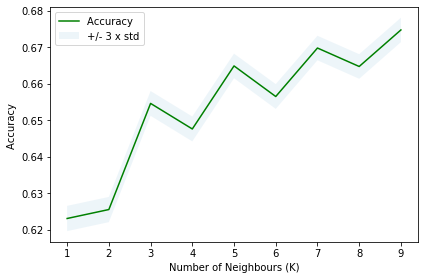

The best accuracy was with 0.674722804148996 with k = 9


In [82]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

Confusion matrix, without normalization


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


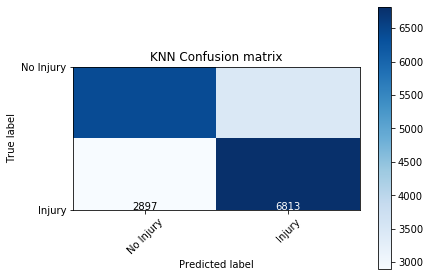

In [83]:
KNN = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train, y_train)
yhat = KNN.predict(X_test)
KNN_j_score = jaccard_similarity_score(y_test, yhat)
KNN_f_score = f1_score(y_test, yhat, average='weighted')
KNN_class_report = classification_report(y_test, yhat)
KNN_dict = classification_report(y_test, yhat, output_dict=True)

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'], normalize=False,  title='KNN Confusion matrix')

In [84]:
print('KNN jaccard score:', round(KNN_j_score, 4))
print('KNN F1 score:', round(KNN_f_score, 4))
print('KNN classification report:\n\n', KNN_class_report)

KNN jaccard score: 0.6747
KNN F1 score: 0.6745
KNN classification report:

               precision    recall  f1-score   support

           1       0.69      0.65      0.67      9861
           2       0.66      0.70      0.68      9710

    accuracy                           0.67     19571
   macro avg       0.68      0.67      0.67     19571
weighted avg       0.68      0.67      0.67     19571



## Decision Tree

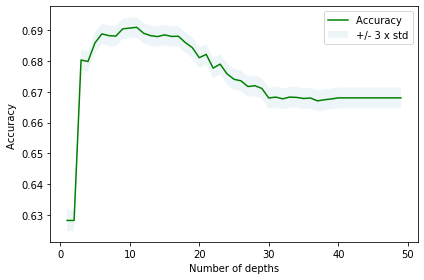

The best accuracy was with 0.690920239129324 with depth = 11


In [86]:
Depth = 50
mean_acc = np.zeros((Depth-1))
std_acc = np.zeros((Depth-1))
ConfustionMx = [];
for n in range(1,Depth):
    
    #Train Model and Predict  
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=42).fit(X_train,y_train)
    yhat = DT.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Depth),mean_acc,'g')
plt.fill_between(range(1,Depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of depths')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with depth =", mean_acc.argmax()+1) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Confusion matrix, without normalization


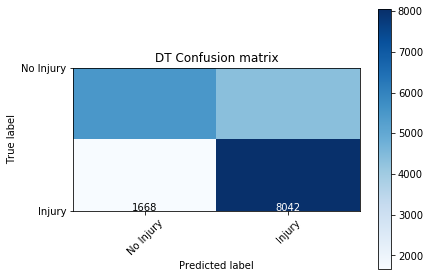

In [87]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = mean_acc.argmax()+1, random_state=42).fit(X_train, y_train)
yhat = DT.predict(X_test)
DT_j_score = jaccard_similarity_score(y_test, yhat)
DT_f_score = f1_score(y_test, yhat, average='weighted')
DT_class_report = classification_report(y_test, yhat)
DT_dict = classification_report(y_test, yhat, output_dict=True)

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'], normalize=False,  title='DT Confusion matrix')

In [88]:
print('DT jaccard score:', round(DT_j_score, 4))
print('DT F1 score:', round(DT_f_score, 4))
print('DT classification report:\n\n', DT_class_report)

DT jaccard score: 0.6909
DT F1 score: 0.6852
DT classification report:

               precision    recall  f1-score   support

           1       0.77      0.56      0.64      9861
           2       0.65      0.83      0.73      9710

    accuracy                           0.69     19571
   macro avg       0.71      0.69      0.69     19571
weighted avg       0.71      0.69      0.69     19571



## SVM

Confusion matrix, without normalization


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


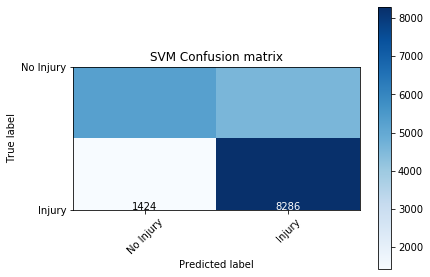

In [89]:
SVM = svm.SVC(kernel='rbf', gamma='auto', random_state=42).fit(X_train, y_train)
yhat = SVM.predict(X_test)
SVM_j_score = jaccard_similarity_score(y_test, yhat)
SVM_f_score = f1_score(y_test, yhat, average='weighted')
SVM_class_report = classification_report(y_test, yhat)
SVM_dict = classification_report(y_test, yhat, output_dict=True)

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='SVM Confusion matrix')

In [90]:
print('SVM jaccard score:', round(SVM_j_score, 4))
print('SVM F1 score:', round(SVM_f_score, 4))
print('SVM classification report:\n\n', SVM_class_report)

SVM jaccard score: 0.6927
SVM F1 score: 0.6849
SVM classification report:

               precision    recall  f1-score   support

           1       0.79      0.53      0.64      9861
           2       0.64      0.85      0.73      9710

    accuracy                           0.69     19571
   macro avg       0.72      0.69      0.69     19571
weighted avg       0.72      0.69      0.68     19571



# Results

In [91]:
Jaccard_results = {'K-Nearest Neighbors':round(KNN_j_score, 4),
             'Decision Tree':round(DT_j_score, 4),
             'Support Vector Machine':round(SVM_j_score, 4)}
F1_results = {'K-Nearest Neighbors':round(KNN_f_score, 4),
             'Decision Tree':round(DT_f_score, 4),
             'Support Vector Machine':round(SVM_f_score, 4)}
Class_F1_results = {'K-Nearest Neighbors':round(KNN_dict['2']['f1-score'], 4),
                    'Decision Tree':round(DT_dict['2']['f1-score'], 4),
                    'Support Vector Machine':round(SVM_dict['2']['f1-score'], 4)}
Class_Recall_results = {'K-Nearest Neighbors':round(KNN_dict['2']['recall'], 4),
                        'Decision Tree':round(DT_dict['2']['recall'], 4),
                        'Support Vector Machine':round(SVM_dict['2']['recall'], 4)}

In [92]:
table = pd.DataFrame([Jaccard_results, F1_results, Class_F1_results, Class_Recall_results],
                        index=['Jaccard Score','F1 Score','Injury Class F1 Score','Injury Class Recall Score'])
table

,K-Nearest Neighbors,Decision Tree,Support Vector Machine
Jaccard Score,0.6747,0.6909,0.6927
F1 Score,0.6745,0.6852,0.6849
Injury Class F1 Score,0.6816,0.7267,0.7337
Injury Class Recall Score,0.7016,0.8282,0.8533


From all the classifiers, **Support Vector Machine** has the best score of accuracy. The F1 score (the weighted average of the precision and recall) is highest with the **K-Nearest Neighbors** classifier. F1 Score and the recall score just the injury class are important scores, if there is a strong need to predict more of the injuries correctly. For a higher recall score in the injury class, the classifier will also mis-classify more of the 'property damage only' categories as 'injuries'. It would be a waste ambulance resources to false alarms when a real injury is happening elsewhere. That's why in my opinion K-Nearest Neighbors would be the best option since it scored the highest F1 score and it is sensitive to both the 'property damage only' class and the 'injury' class.

However, to see which features have the biggest influence in determining whether or not injury occurs when there's a collision the data through the Decision Tree classifier will be run.

In [93]:
X = original_df[Features].copy()
y = original_df['SEVERITYCODE'].copy()
print('Full data set:', X.shape, y.shape)

Full data set: (143747, 35) (143747,)


In [95]:
X = preprocessing.StandardScaler().fit_transform(X.astype(np.float))
KNN_Final_Model = KNeighborsClassifier(n_neighbors = 9).fit(X,y)
DT_Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth = 11).fit(X,y)

In [96]:
KNN_Final_Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [97]:
DT_Final_Model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
importance = DT_Final_Model.feature_importances_
feature_importance = []
for feature, score in zip(Features, importance):
    feature_importance.append([feature, round(score, 2)])
feature_importance_df = pd.DataFrame(sorted(feature_importance, key=lambda x:x[1], reverse=True),
                                columns=['Feature','Importance Score'])
feature_importance_df

,Feature,Importance Score
0,VEHCOUNT,0.43
1,Parked Car,0.28
2,Sideswipe,0.12
3,PERSONCOUNT,0.10
4,PEDCOUNT,0.01
5,UNDERINFL,0.01
6,Right Turn,0.01
7,Hour,0.01
8,PEDCYLCOUNT,0.00
9,Block,0.00


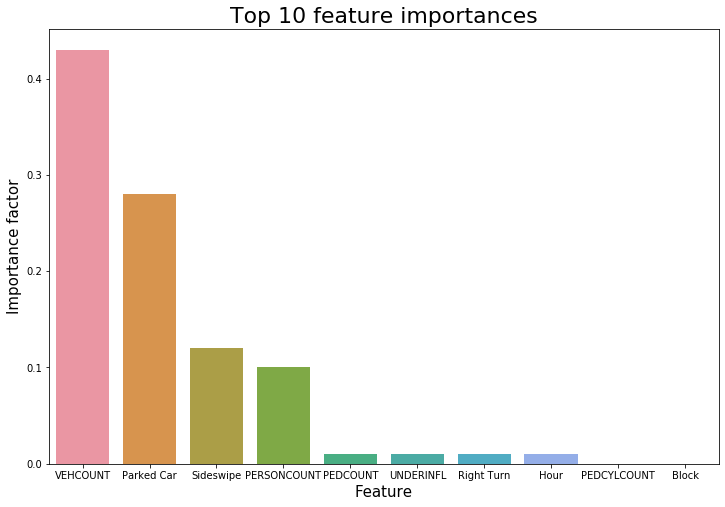

In [102]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = feature_importance_df['Feature'][:10], y=feature_importance_df['Importance Score'][:8])
ax.set_xlabel('Feature', fontsize=15)
ax.set_ylabel('Importance factor', fontsize=15)
ax.set_title('Top 10 feature importances', fontsize=22)
plt.show()

In [103]:
def bar_plot_hue(data_column, x_label, y_label, title, size=(8,6), rotate=0):
    plt.figure(figsize=size)
    ax = sns.countplot(x = data_column, hue=original_df['SEVERITYDESC'], hue_order=('Property Damage Only Collision', 'Injury Collision'))
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.legend(loc='upper right')
    plt.show()

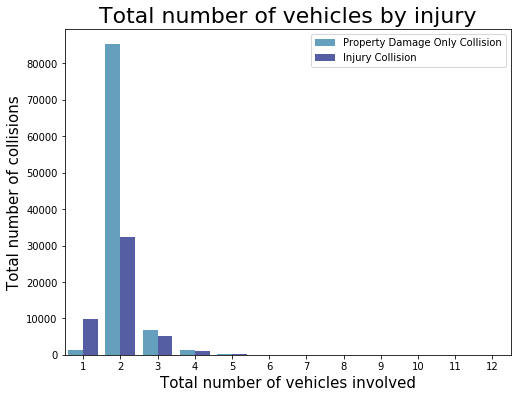

In [105]:
value_dif0 = original_df.loc[original_df['VEHCOUNT']!=0]
bar_plot_hue(value_dif0['VEHCOUNT'], 'Total number of vehicles involved', 'Total number of collisions', 
             'Total number of vehicles by injury')


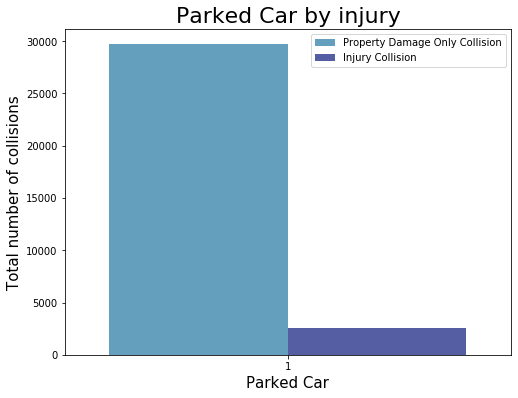

In [106]:
value_dif0 = original_df.loc[original_df['Parked Car']!=0]
bar_plot_hue(value_dif0['Parked Car'], 'Parked Car', 'Total number of collisions', 
             'Parked Car by injury')

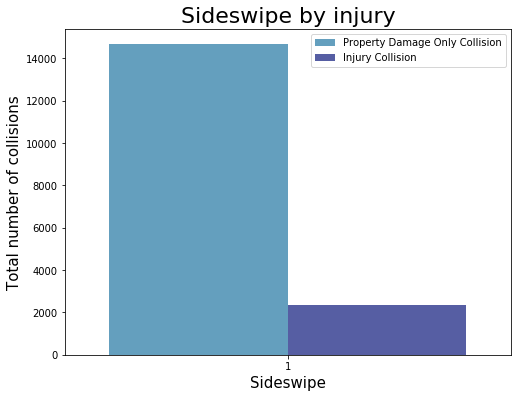

In [107]:
value_dif0 = original_df.loc[original_df['Sideswipe']!=0]
bar_plot_hue(value_dif0['Sideswipe'], 'Sideswipe', 'Total number of collisions', 
             'Sideswipe by injury')

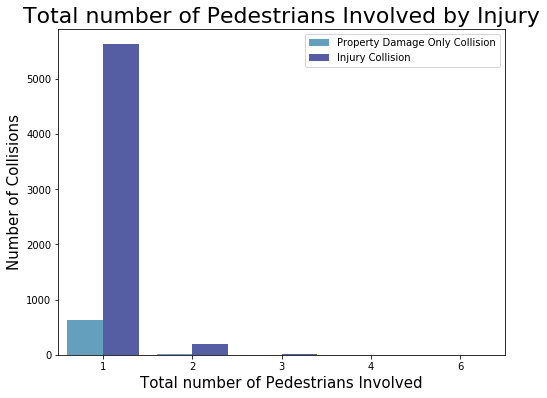

In [108]:
value_dif0 = original_df.loc[original_df['PEDCOUNT']!=0]
bar_plot_hue(value_dif0['PEDCOUNT'], 'Total number of Pedestrians Involved', 'Number of Collisions', 'Total number of Pedestrians Involved by Injury')

# Disscusion and conclusion
Whereas, 'parked car' and 'sideswipe' categories result in few injuries, the number of vehicles turns out to be important. When it is three or more of them, the chance of injury is nearly 50%.  The chance for injury far outweighs property damage if there is only one car.
Any collision with a pedestrian is likely to cause injury. Chance of injury also increases when the number of people involved goes up.
As individuals, we can be more aware of driving habits in certain conditions. Driving only when sober, giving pedestrians right of way and pay more attention during midnight will reduce the risk for injury.
Also, lowering speed limits in the areas where injuries occur most often, no turn on red and letting pedestrians go first may be ways to improve injury rates for the city.